<a href="https://colab.research.google.com/github/shahnaz83/Transfer-Learning-VGG16-cifar10/blob/main/VGG16_Transfer_learning_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning

## Transfer Laerning

In this notebook, we will perform transfer learning to train CIFAR-10 dataset on VGG16 model available in Keras



In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

## Loading  Data
[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset has 32 x 32 RGB images belonging to 10 classes. We will load the dataset from Keras.


In [2]:

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

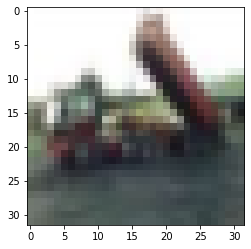

In [5]:
plt.imshow(x_train[2,:,:,:])

In [6]:
x_train, x_test = x_train/255.0, x_test/255.0

In [7]:
#Create a base model from the pre-trained VGG model
base_model = keras.applications.VGG16(weights="imagenet", # Load weights pre-trained on ImageNet.
                                      input_shape = (32,32,3),
                                      include_top = False  # Do not include the ImageNet classifier at the top.
                                      )

ga_layer = keras.layers.GlobalAveragePooling2D()(base_model.output)
ga_layer=keras.layers.Dropout(0.2)(ga_layer) # Regularize with dropout

ga_layer=keras.layers.Dense(1024)(ga_layer)
output = keras.layers.Dense(10, activation="softmax")(ga_layer)
model = keras.Model(inputs=base_model.input, outputs=output)
# Freeze the base_model
for layer in base_model.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
  model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
#compile part
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
#Train the model
history=model.fit(x_train, y_train, epochs=5, validation_split=0.15)

Epoch 1/5
1329/1329 [==============================] - 508s 380ms/step - loss: 1.5214 - accuracy: 0.4697 - val_loss: 1.3559 - val_accuracy: 0.5299
Epoch 2/5
1329/1329 [==============================] - 498s 375ms/step - loss: 1.4265 - accuracy: 0.5009 - val_loss: 1.2963 - val_accuracy: 0.5513
Epoch 3/5
1329/1329 [==============================] - 497s 374ms/step - loss: 1.4143 - accuracy: 0.5093 - val_loss: 1.3181 - val_accuracy: 0.5413
Epoch 4/5
1329/1329 [==============================] - 504s 379ms/step - loss: 1.4038 - accuracy: 0.5091 - val_loss: 1.3129 - val_accuracy: 0.5463
Epoch 5/5
1329/1329 [==============================] - 557s 419ms/step - loss: 1.4000 - accuracy: 0.5106 - val_loss: 1.2795 - val_accuracy: 0.5576


In [ ]:
#items in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

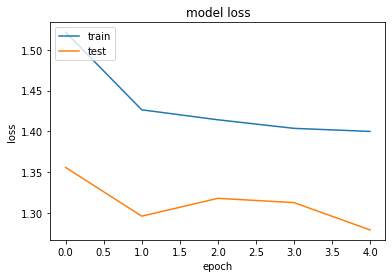

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

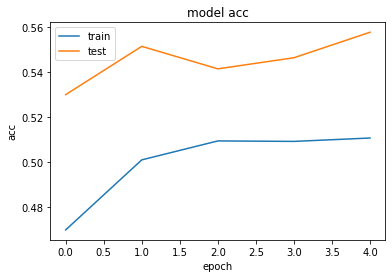

In [ ]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Model Evaluation on Test Dataset
model.evaluate(x_test, y_test)

313/313 [==============================] - 101s 322ms/step - loss: 1.2961 - accuracy: 0.5501


[1.296080470085144, 0.5501000285148621]

In [ ]:
#in case need to have predicted labels
y_pred = model.predict(x_test)

313/313 [==============================] - 101s 321ms/step


In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5501

## Fine-tuning the model
The model can be improved by unfreezing the base model, and retraining it on a very low learning rate.

You need to monitor this step because the wrong implementation can lead to overfitting. First, unfreeze the base model. Unfreeze the base_model. Note that it keeps running in inference mode since we passed training=False when calling it. This means that the batchnorm layers will not update their batch statistics. This prevents the batchnorm layers from undoing all the training we've done so far.

##Fine Tunning

In [ ]:
#Fine-tuning the model
base_model.trainable = True
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
#compile part
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(1e-5), # Low learning rate
              metrics=["accuracy"])

In [ ]:
#Callback
model_checkpoint_callback=keras.callbacks.ModelCheckpoint("model",save_best_only=True)

In [ ]:
#Train the model
history1=model.fit(x_train, y_train, epochs=5, validation_split=0.15,callbacks=[model_checkpoint_callback])

Epoch 1/5
1329/1329 [==============================] - ETA: 0s - loss: 0.6233 - accuracy: 0.7818

1329/1329 [==============================] - 45s 33ms/step - loss: 0.6233 - accuracy: 0.7818 - val_loss: 0.6525 - val_accuracy: 0.7727
Epoch 2/5
1327/1329 [============================>.] - ETA: 0s - loss: 0.4857 - accuracy: 0.8280

1329/1329 [==============================] - 42s 32ms/step - loss: 0.4857 - accuracy: 0.8280 - val_loss: 0.5935 - val_accuracy: 0.7968
Epoch 3/5
1329/1329 [==============================] - 40s 30ms/step - loss: 0.3877 - accuracy: 0.8636 - val_loss: 0.6067 - val_accuracy: 0.7945
Epoch 4/5
1329/1329 [==============================] - 40s 30ms/step - loss: 0.3066 - accuracy: 0.8913 - val_loss: 0.5986 - val_accuracy: 0.8068
Epoch 5/5
1329/1329 [==============================] - 40s 30ms/step - loss: 0.2433 - accuracy: 0.9141 - val_loss: 0.5962 - val_accuracy: 0.8123


## Fine Tunning
### another approach

In [ ]:
#Create a base model from the pre-trained VGG model
base_model = keras.applications.VGG16(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(32, 32, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
# Freeze the base_model
set_trainable = False
for lyr in base_model.layers:
  if lyr.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    lyr.trainable = True
  else:
    lyr.trainable = False
    

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
#Create a base model from the pre-trained VGG model


ga_layer = keras.layers.GlobalAveragePooling2D()(base_model.output)
ga_layer=keras.layers.Dropout(0.2)(ga_layer) # Regularize with dropout

ga_layer=keras.layers.Dense(1024)(ga_layer)
output = keras.layers.Dense(10, activation="softmax")(ga_layer)
model = keras.Model(inputs=base_model.input, outputs=output)
# Freeze the base_model
#for layer in base_model.layers:
  #layer.trainable = False
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
#compile part
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(1e-5), # Low learning rate
              metrics=["accuracy"])

In [ ]:
#Callback
model_checkpoint_callback=keras.callbacks.ModelCheckpoint("model",save_best_only=True)

In [ ]:
#Train the model
history2=model.fit(x_train, y_train, epochs=5, validation_split=0.15,callbacks=[model_checkpoint_callback])

Epoch 1/5
1329/1329 [==============================] - 2198s 2s/step - loss: 1.2729 - accuracy: 0.5570 - val_loss: 0.9733 - val_accuracy: 0.6607
Epoch 2/5
1329/1329 [==============================] - 2000s 2s/step - loss: 0.9303 - accuracy: 0.6754 - val_loss: 0.8694 - val_accuracy: 0.6939
Epoch 3/5
1329/1329 [==============================] - 2090s 2s/step - loss: 0.8214 - accuracy: 0.7147 - val_loss: 0.8318 - val_accuracy: 0.7109
Epoch 4/5
1329/1329 [==============================] - 2494s 2s/step - loss: 0.7471 - accuracy: 0.7393 - val_loss: 0.7842 - val_accuracy: 0.7261
Epoch 5/5
1329/1329 [==============================] - 2125s 2s/step - loss: 0.6879 - accuracy: 0.7578 - val_loss: 0.7672 - val_accuracy: 0.7325


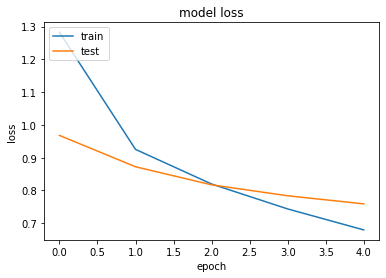

In [ ]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

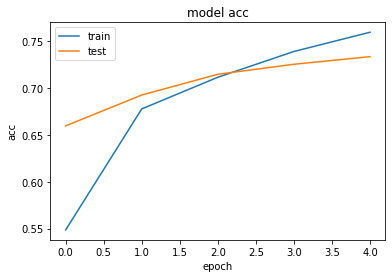

In [ ]:
# summarize history for loss
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()